In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
import seaborn as sns 
import statsmodels

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [38]:
df = pd.read_csv(r"https://raw.githubusercontent.com/BrianNguyen2001/Government-Bond-Yield-Forcasting/main/Bond-VN.csv", index_col= 0,parse_dates=True)
df = df[['GGVF5Y','GGVF1Y','GGVF3Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [39]:
nobs = int(len(df)*0.2)
df_train, df_test = df[0:-nobs], df[-nobs:]

In [40]:
df.describe()

,GGVF5Y,GGVF1Y,GGVF3Y,CPI,FER,Baserate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.080725,0.071499,0.076911,0.601198,3.113248e+10,8.885802,1.479954,0.764756,-2.879439,50.436752,-0.392593
std,0.033168,0.036271,0.034570,0.793960,1.633594e+10,1.085656,1.826785,8.797782,1.856116,6.870214,5.182574
min,0.020000,0.015500,0.018380,-0.756000,1.246660e+10,7.000000,0.310000,-24.009196,-5.027260,38.406899,-11.000000
25%,0.054277,0.043233,0.049960,0.131250,1.644710e+10,8.500000,0.375000,-3.245701,-4.260530,45.166601,-3.800000
50%,0.080000,0.067000,0.076030,0.404500,2.589349e+10,9.000000,0.500000,0.774177,-3.481840,51.674497,2.100000
75%,0.101268,0.092365,0.097433,0.831250,3.652729e+10,9.000000,2.000000,4.193213,-0.897920,57.097769,2.900000
max,0.203330,0.211670,0.206670,3.912000,6.881210e+10,14.000000,9.000000,38.517100,1.224610,59.662135,6.000000


# Linear Regression (OLS)

In [41]:
# y_train = df_train.GGVF5Y
# x_train = df_train[['GGVF1Y','CPI','FER','Baserate','FIR','Fiscal','CurrentAcc']]

# y_test = df_test.GGVF5Y
# x_test = df_test[['GGVF1Y','CPI','FER','Baserate','FIR','Fiscal','CurrentAcc']]


In [42]:
y_train = df_train.GGVF5Y
x_train = df_train[['GGVF1Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]

y_test = df_test.GGVF5Y
x_test = df_test[['GGVF1Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [43]:
x_train,y_train = np.array(x_train), np.array(y_train)
# x_train = sm.add_constant(x_train)


In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
# x_test = sm.add_constant(x_test)

In [45]:
linear_regression_model = sm.OLS(y_train,x_train).fit()
print(linear_regression_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7078.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                   3.38e-160
Time:                        23:12:31   Log-Likelihood:                          528.53
No. Observations:                 130   AIC:                                     -1039.
Df Residuals:                     121   BIC:                                     -1013.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

***=> CPI, Oilrate, Stockreturn, Fiscal và CurrentAcc không có ý nghĩa thống kê. Tuy nhiên ta không thể loại bỏ các biến này được. Ta cần kiểm tra sự phụ thuộc của chúng vào các biến độc lập khác.***

# Đa cộng tuyến

In [46]:
# corr = df[['GGVF1Y','CPI','FER','Baserate','FIR','Fiscal','CurrentAcc']].corr()
# print('Pearson correlation coefficient matrix of each variables:\n', corr)

In [47]:
corr = df[['GGVF1Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

Pearson correlation coefficient matrix of each variables:
                GGVF1Y       CPI       FER  Baserate       FIR  Stockreturn  \
GGVF1Y       1.000000  0.407160 -0.711157  0.355946  0.053033    -0.075170   
CPI          0.407160  1.000000 -0.284340  0.089155  0.208437    -0.146612   
FER         -0.711157 -0.284340  1.000000  0.164828  0.035706     0.001924   
Baserate     0.355946  0.089155  0.164828  1.000000  0.123343    -0.162785   
FIR          0.053033  0.208437  0.035706  0.123343  1.000000     0.016992   
Stockreturn -0.075170 -0.146612  0.001924 -0.162785  0.016992     1.000000   
Fiscal       0.595066  0.434922 -0.470086  0.241336  0.593817    -0.130853   
Pubdebt     -0.724315 -0.421521  0.695418 -0.019829 -0.514509     0.056811   
CurrentAcc  -0.477741 -0.363015  0.410349 -0.051126 -0.520684     0.105618   

               Fiscal   Pubdebt  CurrentAcc  
GGVF1Y       0.595066 -0.724315   -0.477741  
CPI          0.434922 -0.421521   -0.363015  
FER         -0.470086 

<ipython-input-48-65927551eb8b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


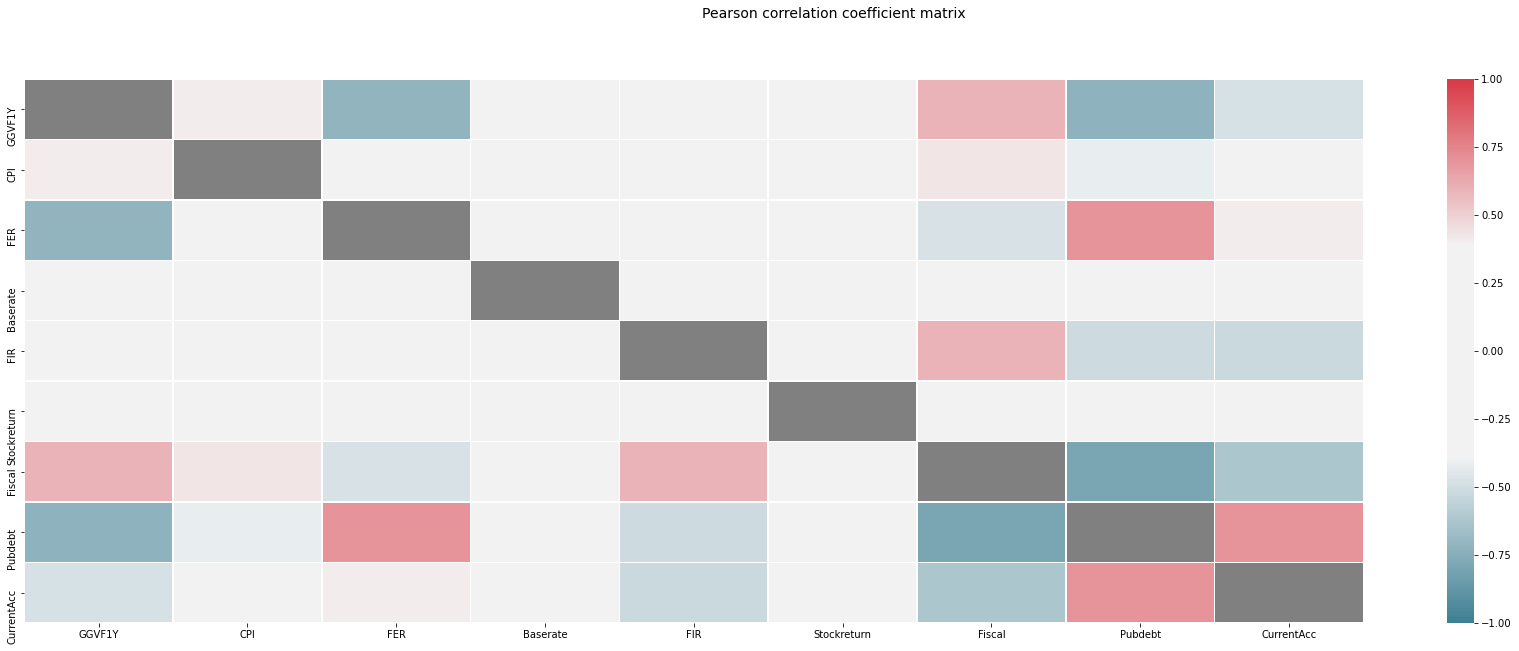

In [48]:
# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


# Tự tương quan

In [49]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(linear_regression_model.resid)

print('Durbin-Watson:', durbinWatson,'\n')
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 0.5777221460606106 

Signs of positive autocorrelation 

Assumption not satisfied


# Kiểm định Ramsey

In [50]:
# Kiểm định Ramsey
ramsey_test = statsmodels.stats.diagnostic.linear_reset(linear_regression_model, power=2, test_type='fitted')
print(f'P-value of Ramsey test: {ramsey_test.pvalue}')

if ramsey_test.pvalue < 0.1:
    print('Vậy với α = 0,1 và P-value < 0.1, mô hình gốc không có sự thiếu biến.')
else:
    print('Vậy với α = 0,1 và P-value > 0.1, mô hình gốc có sự thiếu biến.')

P-value of Ramsey test: 0.13650186353947544
Vậy với α = 0,1 và P-value > 0.1, mô hình gốc có sự thiếu biến.


***Trực quan hóa***

In [51]:
prediction_result = linear_regression_model.predict(x_test)

In [52]:
table_1 = pd.DataFrame({'Real': y_test,
                        'Prediction':prediction_result},index = df_test.index)

In [53]:
table_1.head(10)


,Real,Prediction
Time,,
2017-05-01,0.05078,0.047881
2017-06-01,0.04940,0.047593
2017-07-01,0.04712,0.045451
2017-08-01,0.04986,0.052720
2017-09-01,0.04708,0.051314
2017-10-01,0.04610,0.049734
2017-11-01,0.04636,0.050918
2017-12-01,0.04360,0.047826
2018-01-01,0.03400,0.038817


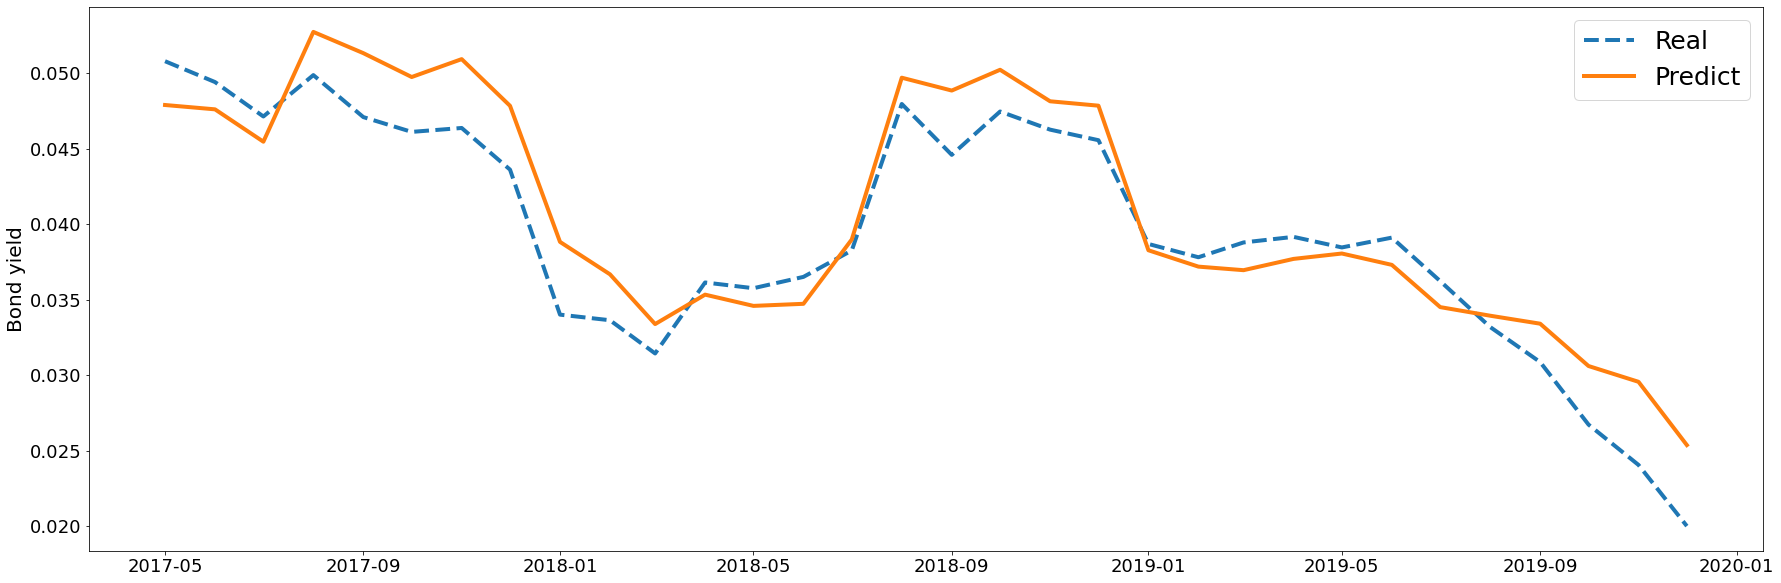

In [67]:
plt.figure(figsize=(30,10))

plt.plot(table_1.Real,'--',linewidth= 4)
plt.plot(table_1.Prediction,linewidth= 4)

plt.legend(['Real','Predict'],fontsize = 25.0)

plt.ylabel('Bond yield',fontsize = 20.0)

plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)
plt.show()


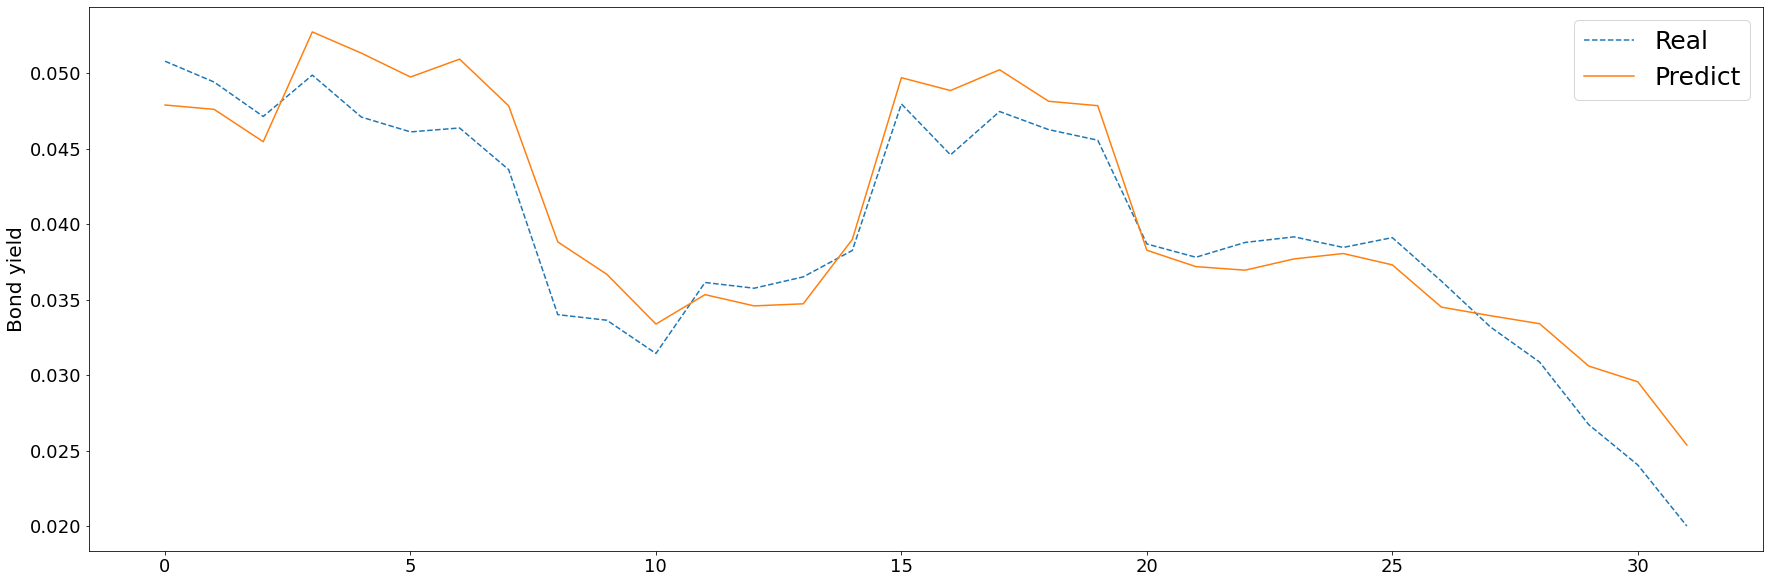

In [64]:
plt.figure(figsize=(30,10))

plt.plot(y_test,'--')
plt.plot(prediction_result)

plt.legend(['Real','Predict'],fontsize = 25.0)

plt.ylabel('Bond yield',fontsize = 20.0)

plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)
plt.show()

plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(table_1.Real, table_1.Prediction))
mae = mean_absolute_error(table_1.Real, table_1.Prediction)
mape = (mean_absolute_percentage_error(table_1.Real, table_1.Prediction))*100

In [56]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.0028801668088831857
MAE  = 0.002481118212566254
MAPE = 6.91%


In [57]:
b = np.array([1,4,1,5,2,9,6,3,7,3,6,9,4,1])

In [58]:
a = np.array([4,1,7,5,3,9,7,5,3,5,1,2,4,8])

In [59]:
len(a) 

14

In [60]:
len(b)

14

In [61]:
# a = np.array(1)
# b = np.array(0.6)
mse = mean_squared_error(a,b)
rmse = np.sqrt(mean_squared_error(a,b))

In [62]:
mse

14.5

In [63]:
rmse

3.8078865529319543